In [ ]:
import pandas as pd

# Carregar a planilha de vendas
planilha_vendas = pd.read_excel('Itens_Agrupados_com_Dia_Semana.xlsx')  # Substitua pelo caminho da sua planilha de vendas

# Mapeamento de quantidades de insumos por prato (adicione mais pratos conforme necessário)
insumos_quantidades = {
    "EXEC FRANGO A PARMEGIANA": {'ARR': 180, 'FEIJ': 120, 'FRANG': 150},
    "EXEC MAMINHA AO MOLHO MADEIRA": {'ARR': 180, 'FEIJ': 120, 'MAMI': 130},
    "EXEC TILAPIA AO POPEYE": {'ARR': 180, 'FEIJ': 120, 'PEIX': 130},
    "MMT FRANGO PARMEGIANA": {'ARR': 180, 'FEIJ': 120, 'FRANG': 130},
    "MMT LASANHA A BOLONHESA": {'MASS': 200, 'MOLH': 160},
    "MMT MAMINHA M. MADEIRA": {'ARR': 180, 'FEIJ': 120, 'MAMI': 130},
    "MMT TILAPIA AO POPEYE": {'ARR': 180, 'FEIJ': 120, 'PEIX': 130},
    "EXEC COSTELA BOVINA": {'ARR': 180, 'FEIJ': 120, 'COST': 130},
    "EXEC FEIJOADA": {'ARR': 180, 'FEIJOA': 250},
    "EXEC FRANGO A MILANESA": {'ARR': 180, 'FEIJ': 120, 'FRANG': 130},
    "EXEC RAVIOLONE A MODA": {'MASS': 200, 'MOLH': 160},
    "MMT COSTELA BOI ASSADA": {'ARR': 180, 'FEIJ': 120, 'COST': 130},
    "MMT FEIJOADA": {'ARR': 180, 'FEIJOA': 250},
    "MMT FRANGO À MILANESA": {'ARR': 180, 'FEIJ': 120, 'FRANG': 130},
    "MMT RAVIOLONE A MODA": {'MASS': 200, 'MOLH': 160},
    "EXEC FRALDINHA GRE COM MOST": {'ARR': 180, 'FEIJ': 120, 'FRAL': 130},
    "EXEC FRANGO RECHEADO": {'ARR': 180, 'FEIJ': 120, 'FRANG': 130},
    "EXEC POLPETTONE RECHEADO": {'MASS': 200, 'MOLH': 160},
    "EXEC VIRADO A PAULISTA": {'ARR': 180, 'TUTU': 180},
    "MMT FRALDINHA ASSADA NA MOST": {'ARR': 180, 'FEIJ': 120, 'FRAL': 130},
    "MMT FRALDINHA GRE COM MOST": {'ARR': 180, 'FEIJ': 120, 'FRAL': 130},
    "MMT PAILLARD COM FETTUCCINE": {'MASS': 200, 'MOLH B': 160},
    "MMT POLPETTONE RECHEADO": {'MASS': 200, 'MOLH B': 160, 'POL': 130},
    "MMT VIRADO A PAULISTA": {'ARR': 180, 'TUTU': 180},
    "EXEC ALCATRA A PARMEGIANA": {'ARR': 180, 'FEIJ': 120, 'CARN': 130},
    "EXEC BACALHAU AO FORNO": {'ARR': 180, 'FEIJ': 120, 'BAC': 130},
    "EXEC COSTELINHA COM BARBECUE": {'ARR': 180, 'FEIJ': 120, 'COST S': 130},
    "EXEC PAILLARD COM FETTUCCINE": {'MASS': 200, 'MOLH B': 160},
    "MMT ALCATRA A PARMEGIANA": {'ARR': 180, 'FEIJ': 120, 'CARN': 130},
    "MMT BACALHAU AO FORNO": {'ARR': 180, 'FEIJ': 120, 'BAC': 130},
    "MMT COSTELINHA SUINA": {'ARR': 180, 'FEIJ': 120, 'COST S': 130},
    "EXEC ALCATRA A MILANESA": {'ARR': 180, 'FEIJ': 120, 'CARN': 130},
    "EXEC FRALDINHA ASSA MOLHO MOST": {'ARR': 180, 'FEIJ': 120, 'FRAL': 130},
    "MMT ALCATRA A MILANESA": {'ARR': 180, 'FEIJ': 120, 'CARN': 130},
    "MMT LASANHA DE BERINJELA": {'MASS': 200, 'MOLH': 160, 'BERIN': 130},
    "EXEC LASANHA A BOLONHESA": {'MASS': 200, 'MOLH': 160},
    "EXEC LASANHA DE BERINJELA": {'MASS': 200, 'MOLH': 160, 'BERIN': 130},
}

# Função para calcular os insumos vendidos a partir das vendas
def calcular_insumos_vendidos(prato, quantidade_vendida, insumos_quantidades):
    insumos_vendidos = {}
    if prato in insumos_quantidades:
        for insumo, quantidade_por_prato in insumos_quantidades[prato].items():
            # Calcula a quantidade vendida de cada insumo
            insumos_vendidos[insumo] = quantidade_por_prato * quantidade_vendida
    return insumos_vendidos

# Convertendo os dados de vendas para DataFrame
planilha_vendas['Data'] = pd.to_datetime(planilha_vendas['Data'], format='%d/%m/%Y')  # Garantir que a coluna de Data seja no formato correto

# Lista para armazenar os dados de insumos vendidos
insumos_totais_por_dia = []

# Calcular os insumos vendidos para cada prato
for _, row in planilha_vendas.iterrows():
    prato = row['Descrição']
    quantidade_vendida = row['Qtde']
    insumos_vendidos = calcular_insumos_vendidos(prato, quantidade_vendida, insumos_quantidades)
    for insumo, quantidade in insumos_vendidos.items():
        insumos_totais_por_dia.append([row['Data'], insumo, quantidade])

# Criando DataFrame de insumos vendidos por dia
insumos_por_dia_df = pd.DataFrame(insumos_totais_por_dia, columns=['Data', 'Insumo', 'Quantidade'])

# Agrupar os insumos por data e somar as quantidades
insumos_por_dia_agrupado = insumos_por_dia_df.groupby(['Data', 'Insumo'])['Quantidade'].sum().reset_index()

# Criar a tabela dinâmica de insumos vendidos por dia
insumos_por_dia_pivot = insumos_por_dia_agrupado.pivot_table(index='Data', columns='Insumo', values='Quantidade', aggfunc='sum', fill_value=0)

# Salvar a planilha com os dados corrigidos
insumos_por_dia_pivot.to_excel('insumos_vendidos_por_dia.xlsx')  # Salve o arquivo no local desejado

print("Planilha gerada com sucesso!")


In [ ]:
import pandas as pd

# Carregar a planilha de vendas
planilha_vendas = pd.read_excel('Itens_Agrupados_com_Dia_Semana.xlsx')  # Substitua pelo caminho da sua planilha de vendas

# Verificar se os dados foram carregados corretamente
planilha_vendas.head()


In [ ]:
# Adicionando novas colunas de tempo
planilha_vendas['Data'] = pd.to_datetime(planilha_vendas['Data'], format='%d/%m/%Y')  # Se necessário

planilha_vendas['Ano'] = planilha_vendas['Data'].dt.year
planilha_vendas['Mês'] = planilha_vendas['Data'].dt.month
planilha_vendas['Dia da Semana'] = planilha_vendas['Data'].dt.dayofweek
planilha_vendas['Semana do Ano'] = planilha_vendas['Data'].dt.isocalendar().week

# Criando coluna de feriado (ajustar para suas necessidades)
feriados = pd.to_datetime(['2024-01-01', '2024-02-25'])  # Exemplo de feriados
planilha_vendas['Feriado'] = planilha_vendas['Data'].apply(lambda x: 1 if x in feriados else 0)


In [ ]:
import pandas as pd

# Carregar a planilha de vendas
planilha_vendas = pd.read_excel('Itens_Agrupados_com_Dia_Semana.xlsx')  # Substitua pelo caminho da sua planilha de vendas

# Dicionário com a quantidade de insumos por prato (ajuste conforme necessário)
insumos_quantidades = {
    "EXEC FRANGO A PARMEGIANA": {'ARR': 180, 'FEIJ': 120, 'FRANG': 150},
    "EXEC MAMINHA AO MOLHO MADEIRA": {'ARR': 180, 'FEIJ': 120, 'MAMI': 130},
    "EXEC TILAPIA AO POPEYE": {'ARR': 180, 'FEIJ': 120, 'PEIX': 130},
    "MMT FRANGO PARMEGIANA": {'ARR': 180, 'FEIJ': 120, 'FRANG': 130},
    "MMT LASANHA A BOLONHESA": {'MASS': 200, 'MOLH': 160},
    "MMT MAMINHA M. MADEIRA": {'ARR': 180, 'FEIJ': 120, 'MAMI': 130},
    "MMT TILAPIA AO POPEYE": {'ARR': 180, 'FEIJ': 120, 'PEIX': 130},
    "EXEC COSTELA BOVINA": {'ARR': 180, 'FEIJ': 120, 'COST': 130},
    "EXEC FEIJOADA": {'ARR': 180, 'FEIJOA': 250},
    "EXEC FRANGO A MILANESA": {'ARR': 180, 'FEIJ': 120, 'FRANG': 130},
    "EXEC RAVIOLONE A MODA": {'MASS': 200, 'MOLH': 160},
    "MMT COSTELA BOI ASSADA": {'ARR': 180, 'FEIJ': 120, 'COST': 130},
    "MMT FEIJOADA": {'ARR': 180, 'FEIJOA': 250},
    "MMT FRANGO À MILANESA": {'ARR': 180, 'FEIJ': 120, 'FRANG': 130},
    "MMT RAVIOLONE A MODA": {'MASS': 200, 'MOLH': 160},
    "EXEC FRALDINHA GRE COM MOST": {'ARR': 180, 'FEIJ': 120, 'FRAL': 130},
    "EXEC FRANGO RECHEADO": {'ARR': 180, 'FEIJ': 120, 'FRANG': 130},
    "EXEC POLPETTONE RECHEADO": {'MASS': 200, 'MOLH': 160},
    "EXEC VIRADO A PAULISTA": {'ARR': 180, 'TUTU': 180},
    "MMT FRALDINHA ASSADA NA MOST": {'ARR': 180, 'FEIJ': 120, 'FRAL': 130},
    "MMT FRALDINHA GRE COM MOST": {'ARR': 180, 'FEIJ': 120, 'FRAL': 130},
    "MMT PAILLARD COM FETTUCCINE": {'MASS': 200, 'MOLH B': 160},
    "MMT POLPETTONE RECHEADO": {'MASS': 200, 'MOLH B': 160, 'POL': 130},
    "MMT VIRADO A PAULISTA": {'ARR': 180, 'TUTU': 180},
    "EXEC ALCATRA A PARMEGIANA": {'ARR': 180, 'FEIJ': 120, 'CARN': 130},
    "EXEC BACALHAU AO FORNO": {'ARR': 180, 'FEIJ': 120, 'BAC': 130},
    "EXEC COSTELINHA COM BARBECUE": {'ARR': 180, 'FEIJ': 120, 'COST S': 130},
    "EXEC PAILLARD COM FETTUCCINE": {'MASS': 200, 'MOLH B': 160},
    "MMT ALCATRA A PARMEGIANA": {'ARR': 180, 'FEIJ': 120, 'CARN': 130},
    "MMT BACALHAU AO FORNO": {'ARR': 180, 'FEIJ': 120, 'BAC': 130},
    "MMT COSTELINHA SUINA": {'ARR': 180, 'FEIJ': 120, 'COST S': 130},
    "EXEC ALCATRA A MILANESA": {'ARR': 180, 'FEIJ': 120, 'CARN': 130},
    "EXEC FRALDINHA ASSA MOLHO MOST": {'ARR': 180, 'FEIJ': 120, 'FRAL': 130},
    "MMT ALCATRA A MILANESA": {'ARR': 180, 'FEIJ': 120, 'CARN': 130},
    "MMT LASANHA DE BERINJELA": {'MASS': 200, 'MOLH': 160, 'BERIN': 130},
    "EXEC LASANHA A BOLONHESA": {'MASS': 200, 'MOLH': 160},
    "EXEC LASANHA DE BERINJELA": {'MASS': 200, 'MOLH': 160, 'BERIN': 130},
}

# Função para calcular os insumos vendidos a partir das vendas
def calcular_insumos_vendidos(prato, quantidade_vendida, insumos_quantidades):
    insumos_vendidos = {}
    if prato in insumos_quantidades:
        for insumo, quantidade_por_prato in insumos_quantidades[prato].items():
            # Calcula a quantidade vendida de cada insumo
            insumos_vendidos[insumo] = quantidade_por_prato * quantidade_vendida
    return insumos_vendidos

# Convertendo os dados de vendas para DataFrame
planilha_vendas['Data'] = pd.to_datetime(planilha_vendas['Data'], format='%d/%m/%Y')  # Garantir que a coluna de Data seja no formato correto

# Lista para armazenar os dados de insumos vendidos
insumos_totais_por_dia = []

# Calcular os insumos vendidos para cada prato
for _, row in planilha_vendas.iterrows():
    prato = row['Descrição']
    quantidade_vendida = row['Qtde']
    insumos_vendidos = calcular_insumos_vendidos(prato, quantidade_vendida, insumos_quantidades)
    for insumo, quantidade in insumos_vendidos.items():
        insumos_totais_por_dia.append([row['Data'], insumo, quantidade])

# Criando DataFrame de insumos vendidos por dia
insumos_por_dia_df = pd.DataFrame(insumos_totais_por_dia, columns=['Data', 'Insumo', 'Quantidade'])

# Agrupar os insumos por data e somar as quantidades
insumos_por_dia_agrupado = insumos_por_dia_df.groupby(['Data', 'Insumo'])['Quantidade'].sum().reset_index()

# Criar a tabela dinâmica de insumos vendidos por dia
insumos_por_dia_pivot = insumos_por_dia_agrupado.pivot_table(index='Data', columns='Insumo', values='Quantidade', aggfunc='sum', fill_value=0)

# Salvar a planilha com os dados corrigidos
insumos_por_dia_pivot.to_excel('insumos_vendidos_por_dia.xlsx')  # Salve o arquivo no local desejado

print("Planilha gerada com sucesso!")


In [ ]:
# Verificar o tamanho de X e y
print(X.shape)
print(y.shape)


In [ ]:
# Checar se os índices estão corretos
print(insumos_por_dia_pivot.index)  # Índice dos insumos
print(planilha_vendas['Data'])      # Índice das vendas


In [ ]:
# Verificar se há duplicatas na coluna 'Data' e quantas existem
duplicates = planilha_vendas[planilha_vendas.duplicated(subset='Data', keep=False)]
print(duplicates)

# Verificar o número de duplicatas
print(planilha_vendas['Data'].duplicated().sum())


In [ ]:
# Agrupar os dados pela coluna 'Data' e somar as quantidades
planilha_vendas_soma = planilha_vendas.groupby('Data')['Qtde'].sum().reset_index()

# Verificar se a soma das quantidades foi feita corretamente
print(planilha_vendas_soma.head())


In [ ]:
# Reindexando os dados de quantidade vendida após agrupar as datas
y = planilha_vendas_soma.set_index('Data')['Qtde'].reindex(insumos_por_dia_pivot.index).values

# Verificar as formas de X e y após o alinhamento
print(X.shape)
print(y.shape)


In [ ]:
# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo
model.fit(X_train, y_train, epochs=100, batch_size=64)


In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=64)


In [ ]:
# Construindo o modelo LSTM
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))

# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliar o modelo (R² e outros parâmetros)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


In [ ]:
# Fazendo previsões com o modelo treinado
y_pred = model.predict(X_test)

# Exibindo as primeiras previsões
print(f"Previsões (primeiras 10 amostras):\n {y_pred[:10].flatten()}")


In [ ]:
# Avaliar o desempenho do modelo com MSE e R² Score
from sklearn.metrics import mean_squared_error, r2_score

# Calculando o erro quadrático médio
mse = mean_squared_error(y_test, y_pred)

# Calculando o R² Score
r2 = r2_score(y_test, y_pred)

# Exibindo os resultados
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalizar os insumos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(insumos_por_dia_pivot)

# Separando variáveis independentes (X) e dependentes (y)
X = X_scaled  # Insumos vendidos por dia
y = planilha_vendas_soma.set_index('Data')['Qtde'].reindex(insumos_por_dia_pivot.index).values  # Quantidade vendida

# Redimensionando X para LSTM (adicionando dimensão de tempo)
X = X.reshape((X.shape[0], 1, X.shape[1]))  # LSTM espera 3 dimensões (samples, time_steps, features)

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construindo o modelo LSTM
model = Sequential()

# Camada LSTM com Dropout
model.add(LSTM(units=50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))  # Dropout de 20% para evitar overfitting

# Camada de saída
model.add(Dense(1))

# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Fazendo previsões com o modelo treinado
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo com MSE e R² Score
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibindo os resultados
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


In [ ]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error: {mape}")


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1)

# Plotando a curva de aprendizado
plt.plot(history.history['loss'], label='Erro de Treinamento')
plt.plot(history.history['val_loss'], label='Erro de Validação')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.title('Curva de Aprendizado')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Supondo que 'insumos_por_dia_pivot' seja o seu DataFrame com os insumos
# e 'planilha_vendas' contenha a quantidade vendida

# Para cada insumo, plote um gráfico de dispersão
insumos_cols = ['ARR', 'BAC', 'BERIN', 'CARN', 'COST', 'COST S', 'FEIJ', 'FEIJOA', 'FRAL', 'FRANG', 'MAMI', 'MASS', 'MOLH', 'MOLH B', 'PEIX', 'POL', 'TUTU']  # Lista de insumos
for insumo in insumos_cols:
    plt.figure(figsize=(10, 6))
    plt.scatter(insumos_por_dia_pivot[insumo], planilha_vendas['Qtde'], alpha=0.6)
    plt.title(f'Relação entre {insumo} e a quantidade vendida')
    plt.xlabel(insumo)
    plt.ylabel('Quantidade Vendida')
    plt.grid(True)
    plt.show()


In [ ]:
# Verifique se as datas de ambos os DataFrames coincidem
print(insumos_por_dia_pivot.index.equals(planilha_vendas['Data']))


In [ ]:
# Alinhando as datas entre os dois DataFrames, caso necessário
planilha_vendas['Data'] = pd.to_datetime(planilha_vendas['Data'], format='%d/%m/%Y')  # Garantir que as datas estão no formato correto
insumos_por_dia_pivot = insumos_por_dia_pivot.reindex(planilha_vendas['Data']).fillna(0)  # Reindexando insumos pela data

# Agora deve ser possível gerar o gráfico
for insumo in insumos_cols:
    plt.figure(figsize=(10, 6))
    plt.scatter(insumos_por_dia_pivot[insumo], planilha_vendas['Qtde'], alpha=0.6)
    plt.title(f'Relação entre {insumo} e a quantidade vendida')
    plt.xlabel(insumo)
    plt.ylabel('Quantidade Vendida')
    plt.grid(True)
    plt.show()


In [ ]:
# Verificar se o insumo tem dados válidos
for insumo in insumos_cols:
    print(f"Verificando dados de {insumo}")
    print(insumos_por_dia_pivot[insumo].describe())  # Estatísticas descritivas dos dados do insumo
    print(planilha_vendas[['Data', 'Qtde']].head())  # Mostrar algumas linhas para verificar as vendas


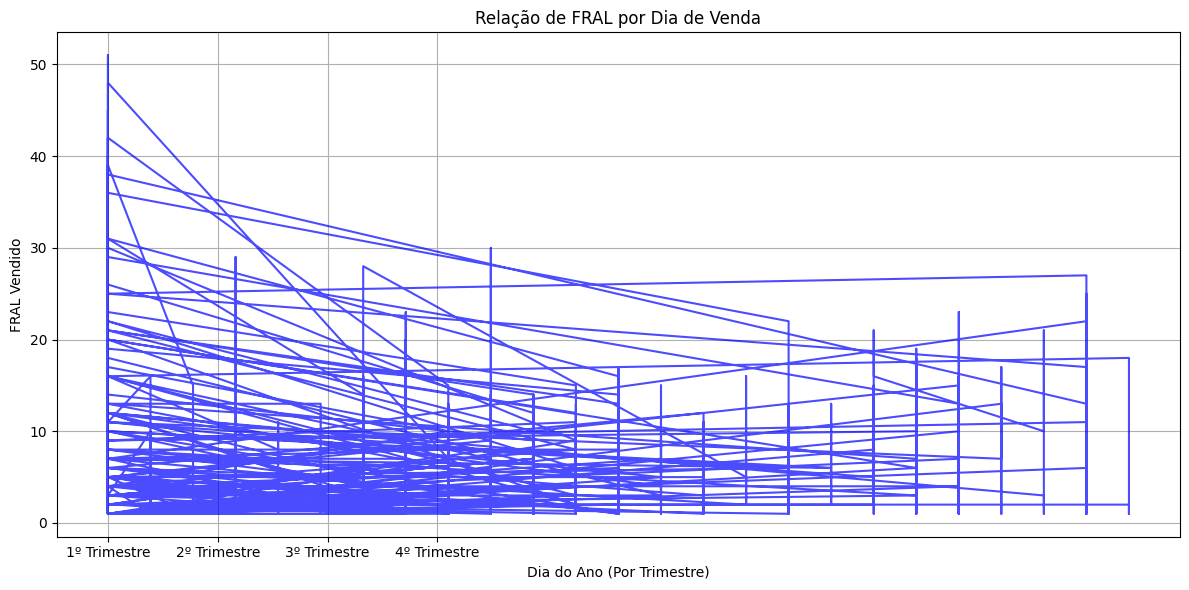

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Gerar gráfico para o insumo FRAL, por exemplo
plt.figure(figsize=(12, 6))

# Plotando os dados (ajustar conforme seus dados)
valid_data = insumos_por_dia_pivot['FRAL'].dropna()  # Remover NaNs de 'FRAL'
valid_sales = planilha_vendas['Qtde'].dropna()  # Remover NaNs de vendas

# Plotar a linha
plt.plot(valid_data, valid_sales[:len(valid_data)], label='FRAL', color='b', alpha=0.7)

# Título e rótulos
plt.title('Relação de FRAL por Dia de Venda')
plt.xlabel('Dia do Ano (Por Trimestre)')
plt.ylabel('FRAL Vendido')

# Segmentar os dados em trimestres
x_ticks = np.linspace(0, len(valid_data), 5)  # Criar 5 pontos no eixo X
x_labels = ['1º Trimestre', '2º Trimestre', '3º Trimestre', '4º Trimestre']  # Definir os rótulos

# Ajustar as marcações do eixo X
plt.xticks(x_ticks[:4], x_labels)  # Use apenas 4 rótulos para corresponder aos 4 trimestres

# Melhorando o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()
